In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import nltk
from nltk.corpus import stopwords
import pydot
import graphviz
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import import_ipynb
from Parameter_Define import *
from CV_Preprocessing import *

importing Jupyter notebook from CV_Preprocessing.ipynb


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jasleen.bhatia@fiserv.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
POSITIVE_FOLDER = parameters_values('pos')
NEGATIVE_FOLDER = parameters_values('neg')
pos_df,pos_file_names = read_resumes('hired', POSITIVE_FOLDER)
neg_df,neg_file_names = read_resumes('rejected', NEGATIVE_FOLDER)
pos_df["Pol"] = 1
neg_df["Pol"] = 0
load_dataset= pd.concat([pos_df, neg_df]).sample(frac=1).reset_index(drop=True)

In [3]:
def split_test_train(data, prop=.80):
    split_index = round(len(data)*prop)
    train = data[:split_index]
    test = data[split_index:]
    return train, test

In [4]:
data=load_dataset[:]
train_x, test_x = split_test_train(data["Text"])
train_y, test_y = split_test_train(data["Pol"])

print("Training set size: {0}, Test set size: {1}".format(len(train_x), len(test_x)))

Training set size: 268, Test set size: 67


In [5]:
#Preprocess X
max_words = 1200
t = tf.keras.preprocessing.text.Tokenizer(num_words = max_words)
t.fit_on_texts(train_x)

train_one_hot_x = t.texts_to_matrix(train_x, mode = 'count')
test_one_hot_x = t.texts_to_matrix(test_x, mode = 'count')

#Preprocess Y
#values = list(set(train_y))

In [6]:
#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(train_y)
#y_encoded = y_encoded.reshape(len(y_encoded), 1)
#onehot_encoder = OneHotEncoder(sparse=False)
#train_y_onehot= onehot_encoder.fit_transform(y_encoded)
#
#y_encoded = label_encoder.fit_transform(test_y)
#y_encoded = y_encoded.reshape(len(y_encoded), 1)
#onehot_encoder = OneHotEncoder(sparse=False)
#test_y_onehot= onehot_encoder.fit_transform(y_encoded)

In [7]:
#from tpot import TPOTClassifier
#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
#import numpy as np
#
#tpot = TPOTClassifier(generations=10, population_size=80, verbosity=2, random_state=42)
#tpot.fit(train_one_hot_x, train_y)
#print(tpot.score(test_one_hot_x, test_y))
#tpot.export('tpot_pipeline_3.py')

In [8]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC,SVC
from tpot.export_utils import set_param_recursive
exported_pipeline = make_pipeline(PCA(iterated_power=9, svd_solver="randomized"),SVC (kernel='linear',C=0.001,  tol=0.01,probability=True))
#exported_pipeline = make_pipeline(VarianceThreshold(threshold=0.1),ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.1, min_samples_leaf=6, min_samples_split=16, n_estimators=100))

# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(train_one_hot_x, train_y)
results = exported_pipeline.predict(test_one_hot_x)



In [9]:
#results

[[25  6]
 [10 26]]
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.81      0.76        31
           0       0.81      0.72      0.76        36

    accuracy                           0.76        67
   macro avg       0.76      0.76      0.76        67
weighted avg       0.77      0.76      0.76        67



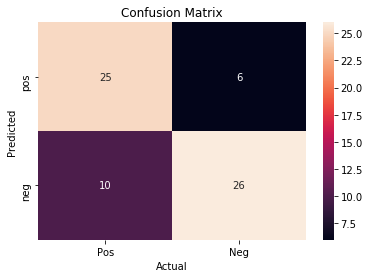

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt     
cm=confusion_matrix(test_y, results,labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Actual');ax.set_ylabel('Predicted'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Pos', 'Neg']); ax.yaxis.set_ticklabels(['pos', 'neg']);
print(cm)
matrix = classification_report(test_y, results,labels=[1,0])
print('Classification report : \n',matrix)

In [11]:
#exported_pipeline.save("Model_Saved/MSBI_Resume_Model.h5")
import pickle
pkl_filename = "Model_Saved/MSBI_Resume_Model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(exported_pipeline, file)



In [20]:
pos_file_names

['Raw_Data/Positive/Resume - Shubham Agrawal.docx',
 'Raw_Data/Positive/Resume - Paresh Ahirrao.docx',
 'Raw_Data/Positive/Nitin Raghuwanshi.docx',
 'Raw_Data/Positive/Resume - Shilpa Mittal.docx',
 'Raw_Data/Positive/Resume - Yogesh Irmal.docx',
 'Raw_Data/Positive/Mohammad Faizan.docx',
 'Raw_Data/Positive/Resume - Disha Mantoo.docx',
 'Raw_Data/Positive/Resume - Omprakash Kendre.docx',
 'Raw_Data/Positive/Mahesh Chavan.docx',
 'Raw_Data/Positive/Resume - Yogesh Balodi.docx',
 'Raw_Data/Positive/Resume - Vipul Sachan.docx',
 'Raw_Data/Positive/Resume - Suresh Chandra.docx',
 'Raw_Data/Positive/Resume - Pankaj Sarogi.docx',
 'Raw_Data/Positive/Resume - Vinuraj.docx',
 'Raw_Data/Positive/Resume - Irwin Chawla.docx',
 'Raw_Data/Positive/Reshma Jadhav cv .docx',
 'Raw_Data/Positive/Resume - Ankur Ahuja.docx',
 'Raw_Data/Positive/Resume - Amandeep Kukkar.docx',
 'Raw_Data/Positive/Resume - Shivani Sengar.docx',
 'Raw_Data/Positive/Raushan_Das_Resume.docx',
 'Raw_Data/Positive/Resume - Abh

In [17]:
testt_y=test_y.tolist() 

In [19]:
from pycm import *
cm = ConfusionMatrix(actual_vector=testt_y, predict_vector=results) # Create CM From Data
cm.position()

{0: {'TP': [1,
   2,
   3,
   5,
   6,
   7,
   8,
   12,
   14,
   15,
   16,
   17,
   20,
   21,
   22,
   23,
   27,
   31,
   34,
   38,
   41,
   50,
   54,
   60,
   63,
   65],
  'FP': [11, 24, 37, 49, 55, 61],
  'TN': [0,
   9,
   10,
   13,
   18,
   19,
   25,
   28,
   29,
   35,
   36,
   39,
   42,
   43,
   45,
   48,
   51,
   53,
   56,
   57,
   58,
   59,
   62,
   64,
   66],
  'FN': [4, 26, 30, 32, 33, 40, 44, 46, 47, 52]},
 1: {'TP': [0,
   9,
   10,
   13,
   18,
   19,
   25,
   28,
   29,
   35,
   36,
   39,
   42,
   43,
   45,
   48,
   51,
   53,
   56,
   57,
   58,
   59,
   62,
   64,
   66],
  'FP': [4, 26, 30, 32, 33, 40, 44, 46, 47, 52],
  'TN': [1,
   2,
   3,
   5,
   6,
   7,
   8,
   12,
   14,
   15,
   16,
   17,
   20,
   21,
   22,
   23,
   27,
   31,
   34,
   38,
   41,
   50,
   54,
   60,
   63,
   65],
  'FN': [11, 24, 37, 49, 55, 61]}}

In [ ]:
exported_pipeline.score(test_one_hot_x,test_y)

In [ ]:
#model = Sequential()
#model.add(GRU(256 , input_shape = (1 , number_of_days) , return_sequences=True))
#model.add(Dropout(0.4))
#model.add(LSTM(256, activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(64 ,  activation = 'relu'))
#model.add(Dense(1, activation='sigmoid'))
#print(model.summary())
#model.compile(loss='mse', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error','accuracy']) 
#history = model.fit(train_one_hot_x, train_y_onehot,batch_size=20,epochs=50,validation_data=(test_one_hot_x, test_y_onehot))
#print(history.history.keys())
#print(model.evaluate(test_one_hot_x, test_y_onehot,batch_size=20, verbose=2))

In [ ]:
#Define model

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(64,activation = "relu",input_shape=(max_words, )))
#model.add(tf.keras.layers.Dense(len(values), activation = "softmax"))
#
#model.summary()
#tf.keras.utils.plot_model(
#    model, to_file='dl_layers.png', show_shapes=True, show_layer_names=True,
#    rankdir='TB', expand_nested=True, dpi=120
#)

In [ ]:
#model.compile(optimizer='Adam',loss='mse',metrics=['accuracy'])
#
#history = model.fit(train_one_hot_x, train_y_onehot,batch_size=20,epochs=10,validation_data=(test_one_hot_x, test_y_onehot))
#print(history.history.keys())
#print(model.evaluate(test_one_hot_x, test_y_onehot,batch_size=20, verbose=2))

In [ ]:
#from sklearn.metrics import classification_report,recall_score,precision_score,confusion_matrix
#y_pred=model.predict(test_one_hot_x)
#print(confusion_matrix(test_y_onehot.argmax(axis=1), y_pred.argmax(axis=1),labels=[1,0]))

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt     
#results=confusion_matrix(test_y_onehot.argmax(axis=1), y_pred.argmax(axis=1),labels=[1,0])
#ax= plt.subplot()
#sns.heatmap(results, annot=True, ax = ax); #annot=True to annotate cells
#
## labels, title and ticks
#ax.set_xlabel('Actual');ax.set_ylabel('Predicted'); 
#ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Pos', 'Neg']); ax.yaxis.set_ticklabels(['pos', 'neg']);
#print(results)